# 第1部 基礎編：データ加工
## 第1章:ウェブからの注文数を分析する10本ノック

> ## 準備

In [18]:
# フォルダーに移動
% cd /content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100/

/content/drive/My Drive/Colab Notebooks/deeplab/data_analysis_100


In [20]:
% ls サンプルコード_20200325/1章

1章_ウェブからの注文数を分析する１０本ノック_answer.ipynb
1章_ウェブからの注文数を分析する１０本ノック.ipynb
customer_master.csv
item_master.csv
transaction_1.csv
transaction_2.csv
transaction_detail_1.csv
transaction_detail_2.csv


In [ ]:
# 日本語フォント用
!pip install japanize-matplotlib

In [220]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline


In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Config
PATH = './サンプルコード_20200325/1章/'


> ## ノック 1: データを読み込んでみよう

In [83]:
# 欠損値チェック
def count_null(df):
  print(df.isnull().sum())
  print("shape: ", df.shape)

In [67]:
customer_master = pd.read_csv(PATH + 'customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [82]:
count_null(customer_master)

customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
dtype: int64
shape:  (5000, 9)


In [24]:
item_master = pd.read_csv(PATH + 'item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [84]:
count_null(item_master)

item_id       0
item_name     0
item_price    0
dtype: int64
shape:  (5, 3)


In [25]:
transaction_1 = pd.read_csv(PATH + 'transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [85]:
count_null(transaction_1)

transaction_id    0
price             0
payment_date      0
customer_id       0
dtype: int64
shape:  (5000, 4)


In [86]:
transaction_2 = pd.read_csv(PATH + 'transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], axis = 0, ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [87]:
count_null(transaction_2)

transaction_id    0
price             0
payment_date      0
customer_id       0
dtype: int64
shape:  (1786, 4)


In [88]:
transaction_detail_1 = pd.read_csv(PATH + 'transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [89]:
count_null(transaction_detail_1)

detail_id         0
transaction_id    0
item_id           0
quantity          0
dtype: int64
shape:  (5000, 4)


In [90]:
transaction_detail_2 = pd.read_csv(PATH + 'transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [91]:
count_null(transaction_detail_2)

detail_id         0
transaction_id    0
item_id           0
quantity          0
dtype: int64
shape:  (2144, 4)


In [112]:
print(transaction_detail_2['transaction_id'].nunique())

2029


- transaction_id に重複あり
- 同じ会計での複数のitemの購入と考えられる

> ## ノック 2: データを結合(ユニオン)してみよう

In [57]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [58]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


> ## ノック3: 売上データ同士を結合(ジヨイン)してみよう

In [125]:
transaction_all = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on = "transaction_id", how = "left")
transaction_all.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [126]:
count_null(transaction_all)

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
dtype: int64
shape:  (7144, 6)


- transaction にある price 列 は transaction_detail に直接 left join してしまうと、重複が起きてしまうので外しておく

> ## ノック4:  マスターデータを結合(ジヨイン)してみよう

In [64]:
data_all = pd.merge(transaction_all, item_master, on = "item_id", how = "left")
data_all = pd.merge(data_all, customer_master, on = "customer_id", how = "left")
data_all.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [128]:
len(data_all)

7144

> ## ノック5: 必要なデータ列を作ろう

- price = item $\times$ item_quanitity 

In [129]:
data_all["price"] = data_all["quantity"] * data_all["item_price"]
data_all[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


> ## ノック６: データ検算をしよう

In [136]:
print(data_all["price"].sum() == transaction["price"].sum())

True


> ## ノック7:各種統計量を把握しよう

In [120]:
count_null(data_all)

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
item_name             0
item_price            0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
dtype: int64
shape:  (7144, 16)


In [141]:
data_all.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
item_name             object
item_price             int64
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
price                  int64
dtype: object

In [138]:
data_all.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [140]:
# 集計期間
print(data_all["payment_date"].min())
print(data_all["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [162]:
data_all.nunique()

detail_id             7144
transaction_id        6786
item_id                  5
quantity                 4
payment_date          6785
customer_id           3018
item_name                5
item_price               5
customer_name         2998
registration_date     3018
customer_name_kana    2988
email                 3018
gender                   2
age                     61
birth                 2809
pref                    47
price                   13
payment_month            6
payment_day              7
dtype: int64

- customer_name < customer_id なので、同姓同名の人なのか、同一人物なのか確認してみる

In [187]:
for name in data_all[data_all['customer_name'].duplicated()]['customer_name'].unique():
  if data_all[data_all['customer_name'] == name]['customer_id'].nunique() > 1:
    print(name)


藤沢 竜也
根本 瞬
阿久津 景子
白川 美咲
川島 友以乃
大貫 明
松永 エリカ
中塚 あさみ
大田 祐一
杉下 陽介
保坂 かおり
金子 妃里
長沢 優
遠藤 くるみ
金山 丈史
古屋 浩太郎
前田 竜也
浅見 優
宮里 大樹
佐々木 淳


In [188]:
data_all[data_all['customer_name'] == '藤沢 竜也']

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,price,payment_month,payment_day
330,330,T0000000429,S005,1,2019-02-09 04:21:35,HD719737,PC-E,210000,藤沢 竜也,2019-01-30 23:23:37,ふじさわ たつや,fujisawa_tatsuya1@example.com,M,62,1957/5/22,東京都,210000,201902,Sat
427,427,T0000000521,S001,1,2019-02-11 13:47:20,HD719737,PC-A,50000,藤沢 竜也,2019-01-30 23:23:37,ふじさわ たつや,fujisawa_tatsuya1@example.com,M,62,1957/5/22,東京都,50000,201902,Mon
730,730,T0000000809,S001,2,2019-02-19 04:18:21,OA953933,PC-A,50000,藤沢 竜也,2019-02-06 04:40:41,ふじさわ たつや,fujisawa_tatsuya@example.com,M,23,1995/11/5,京都府,100000,201902,Tue
1752,1752,T0000001779,S001,1,2019-03-16 17:33:45,HD719737,PC-A,50000,藤沢 竜也,2019-01-30 23:23:37,ふじさわ たつや,fujisawa_tatsuya1@example.com,M,62,1957/5/22,東京都,50000,201903,Sat
4748,4748,T0000004630,S002,1,2019-06-02 15:22:40,OA953933,PC-B,85000,藤沢 竜也,2019-02-06 04:40:41,ふじさわ たつや,fujisawa_tatsuya@example.com,M,23,1995/11/5,京都府,85000,201906,Sun
5201,5201,T0000005060,S001,1,2019-06-13 18:40:59,HD719737,PC-A,50000,藤沢 竜也,2019-01-30 23:23:37,ふじさわ たつや,fujisawa_tatsuya1@example.com,M,62,1957/5/22,東京都,50000,201906,Thu


- 生年月日が異なるので、同姓同名なだけでした。

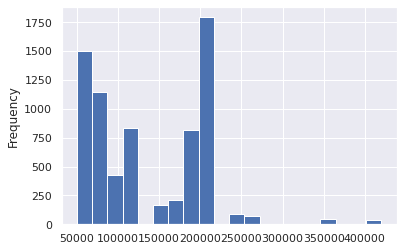

In [160]:
# price
data_all['price'].plot.hist(bins = 20)

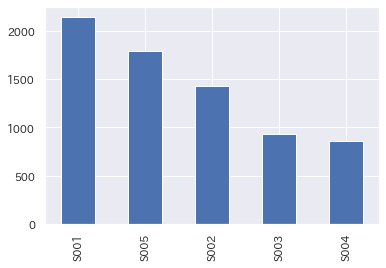

In [226]:
# item
data_all['item_id'].value_counts().plot(kind='bar')

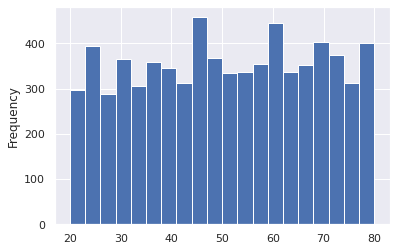

In [161]:
# age
data_all['age'].plot.hist(bins = 20)

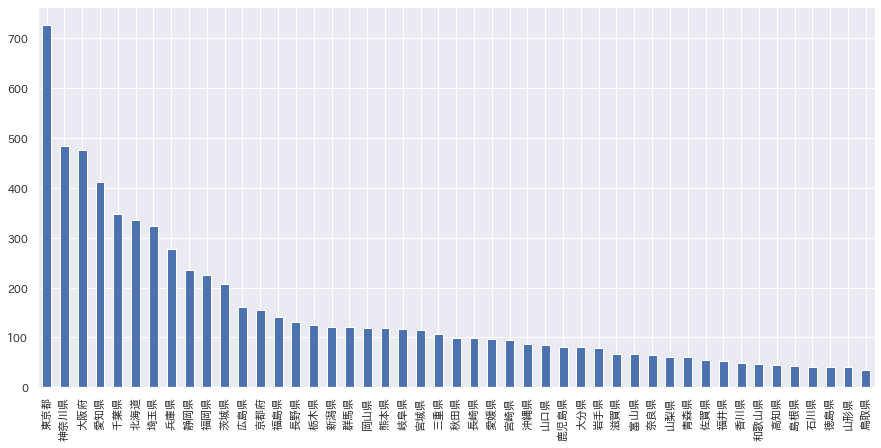

In [224]:
# prefecture
plt.figure(figsize=(15, 7))
data_all['pref'].value_counts().plot(kind='bar')

> ## ノック：月別でデータを集計してみよう

In [142]:
data_all["payment_date"] = pd.to_datetime(data_all["payment_date"])
data_all["payment_month"] = data_all["payment_date"].dt.strftime("%Y%m") 

data_all.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [149]:
# 曜日別

data_all['payment_day'] = data_all['payment_date'].dt.strftime("%a")
data_all.groupby('payment_day').sum()['price']

payment_day
Fri    144570000
Mon    131370000
Sat    140625000
Sun    140785000
Thu    136720000
Tue    137995000
Wed    139070000
Name: price, dtype: int64

> ## ノック９：月別、商品別でデータを集計してみよう

In [150]:
data_all.groupby(by = ["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [153]:
pd.pivot_table(data_all, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = np.sum)

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

In [154]:
pd.pivot_table(data_all, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = np.mean)

price                 ...  quantity          
payment_month         201902         201903  ...    201906    201907
item_name                                    ...                    
PC-A            72305.389222   71428.571429  ...  1.464789  1.406685
PC-B           106518.987342  107142.857143  ...  1.215517  1.252830
PC-C           130263.157895  133426.573427  ...  1.089820  1.117241
PC-D           191042.944785  185179.856115  ...  1.066667  1.035714
PC-E           215287.769784  215656.565657  ...  1.013423  1.020958

[5 rows x 12 columns]

> ## ノック10: 商品別の売上推移を可視化してみよう.

In [228]:
df_tmp = pd.pivot_table(data_all, index='payment_month', columns = 'item_name', values = 'price', aggfunc = 'sum')
df_tmp.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


Text(0.5, 1.0, 'Monthly Sales by Product')

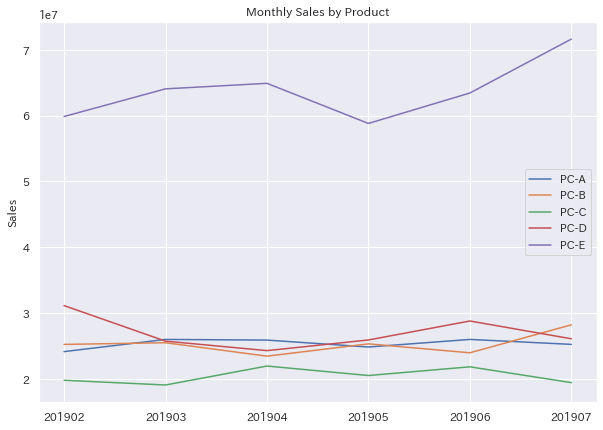

In [230]:
items = ['A', 'B', 'C', 'D', 'E']
plt.figure(figsize = (10, 7))
for x in items:
  plt.plot(list(df_tmp.index), df_tmp["PC-" + x], label = ("PC-" + x))
plt.legend()
plt.ylabel("Sales")
plt.title("Monthly Sales by Product")